# **Линейная регрессия**

In [1]:
import pandas as pd

df = pd.read_csv('/content/Expanded_data_with_more_features.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [2]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

**1. Заполнение пропусков**

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [4]:
len(df)

30641

In [5]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [6]:
df.groupby('EthnicGroup').count()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
EthnicGroup,,,,,,,,,,,,,
group A,2219,2078,2219,2081,2121,2167,2168,2096,1999,2146,2219,2219,2219
group B,5826,5470,5826,5488,5605,5704,5649,5546,5238,5642,5826,5826,5826
group C,9212,8652,9212,8652,8858,9050,8929,8763,8280,8933,9212,9212,9212
group D,7503,7056,7503,7070,7218,7343,7285,7106,6713,7270,7503,7503,7503
group E,4041,3814,4041,3804,3892,3954,3918,3820,3624,3924,4041,4041,4041


In [7]:
df[['EthnicGroup']] = df[['EthnicGroup']].fillna('group C')

In [8]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [9]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [10]:
df.groupby('ParentEduc').count()

,Gender,EthnicGroup,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
ParentEduc,,,,,,,,,,,,,
associate's degree,5550,5550,5550,5213,5351,5446,5380,5263,5026,5379,5550,5550,5550
bachelor's degree,3386,3386,3386,3209,3251,3320,3286,3213,3057,3269,3386,3386,3386
high school,5687,5687,5687,5341,5475,5568,5541,5387,5086,5503,5687,5687,5687
master's degree,2023,2023,2023,1903,1939,1985,1952,1927,1800,1967,2023,2023,2023
some college,6633,6633,6633,6216,6369,6488,6457,6313,5964,6442,6633,6633,6633
some high school,5517,5517,5517,5192,5295,5408,5336,5216,4930,5343,5517,5517,5517


In [11]:
df[['ParentEduc']] = df[['ParentEduc']].fillna('some college')

In [12]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [13]:
df['TestPrep'].unique()

array(['none', nan, 'completed'], dtype=object)

In [14]:
df.groupby('TestPrep').count()

,Gender,EthnicGroup,ParentEduc,LunchType,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
TestPrep,,,,,,,,,,,,,
completed,9955,9955,9955,9955,9544,9749,9657,9423,8963,9617,9955,9955,9955
none,18856,18856,18856,18856,18140,18464,18321,17914,16921,18290,18856,18856,18856


In [15]:
df[['TestPrep']] = df[['TestPrep']].fillna('none')

In [16]:
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [17]:
df.groupby('ParentMaritalStatus').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,,,,,,,,,,,
divorced,4919,4919,4919,4919,4919,4822,4791,4678,4390,4757,4919,4919,4919
married,16844,16844,16844,16844,16844,16484,16331,15973,15140,16331,16844,16844,16844
single,7097,7097,7097,7097,7097,6963,6891,6725,6392,6870,7097,7097,7097
widowed,591,591,591,591,591,578,569,562,523,572,591,591,591


In [18]:
df[['ParentMaritalStatus']] = df[['ParentMaritalStatus']].fillna('married')
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,631
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [19]:
df.groupby('PracticeSport').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
PracticeSport,,,,,,,,,,,,,
never,4004,4004,4004,4004,4004,4004,3916,3808,3589,3860,4004,4004,4004
regularly,10793,10793,10793,10793,10793,10793,10435,10267,9666,10471,10793,10793,10793
sometimes,15213,15213,15213,15213,15213,15213,14765,14398,13692,14744,15213,15213,15213


In [20]:
df[['PracticeSport']] = df[['PracticeSport']].fillna('sometimes')
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,904
NrSiblings,1572
TransportMeans,3134


In [21]:
df.groupby('IsFirstChild').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
IsFirstChild,,,,,,,,,,,,,
no,10655,10655,10655,10655,10655,10655,10655,10066,9557,10316,10655,10655,10655
yes,19082,19082,19082,19082,19082,19082,19082,18153,17134,18489,19082,19082,19082


In [22]:
df[['IsFirstChild']] = df[['IsFirstChild']].fillna('yes')
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,1572
TransportMeans,3134


In [23]:
df.groupby('NrSiblings').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
NrSiblings,,,,,,,,,,,,,
0.0,3085,3085,3085,3085,3085,3085,3085,3085,2772,3004,3085,3085,3085
1.0,8217,8217,8217,8217,8217,8217,8217,8217,7358,7931,8217,8217,8217
2.0,6790,6790,6790,6790,6790,6790,6790,6790,6103,6598,6790,6790,6790
3.0,6123,6123,6123,6123,6123,6123,6123,6123,5521,5923,6123,6123,6123
4.0,2941,2941,2941,2941,2941,2941,2941,2941,2649,2849,2941,2941,2941
5.0,1320,1320,1320,1320,1320,1320,1320,1320,1171,1284,1320,1320,1320
6.0,302,302,302,302,302,302,302,302,261,287,302,302,302
7.0,291,291,291,291,291,291,291,291,261,283,291,291,291


In [24]:
df[['NrSiblings']] = df[['NrSiblings']].fillna(1.0)
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,3134


In [25]:
df.groupby('NrSiblings').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
NrSiblings,,,,,,,,,,,,,
0.0,3085,3085,3085,3085,3085,3085,3085,3085,2772,3004,3085,3085,3085
1.0,9789,9789,9789,9789,9789,9789,9789,9789,8769,9458,9789,9789,9789
2.0,6790,6790,6790,6790,6790,6790,6790,6790,6103,6598,6790,6790,6790
3.0,6123,6123,6123,6123,6123,6123,6123,6123,5521,5923,6123,6123,6123
4.0,2941,2941,2941,2941,2941,2941,2941,2941,2649,2849,2941,2941,2941
5.0,1320,1320,1320,1320,1320,1320,1320,1320,1171,1284,1320,1320,1320
6.0,302,302,302,302,302,302,302,302,261,287,302,302,302
7.0,291,291,291,291,291,291,291,291,261,283,291,291,291


In [26]:
df.groupby('TransportMeans').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
TransportMeans,,,,,,,,,,,,,
private,11362,11362,11362,11362,11362,11362,11362,11362,11362,10986,11362,11362,11362
school_bus,16145,16145,16145,16145,16145,16145,16145,16145,16145,15656,16145,16145,16145


In [27]:
df[['TransportMeans']] = df[['TransportMeans']].fillna('other')
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


In [28]:
df.groupby('WklyStudyHours').count()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,,,,,,,,,,,
5 - 10,16246,16246,16246,16246,16246,16246,16246,16246,16246,16246,16246,16246,16246
< 5,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238,8238
> 10,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202


In [29]:
df[['WklyStudyHours']] = df[['WklyStudyHours']].fillna('5 - 10')
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


**2. Кодирование категориальных признаков**

In [30]:
df.dtypes

,0
Gender,object
EthnicGroup,object
ParentEduc,object
LunchType,object
TestPrep,object
ParentMaritalStatus,object
PracticeSport,object
IsFirstChild,object
NrSiblings,float64
TransportMeans,object


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,0,group C,some college,standard,none,married,sometimes,yes,0.0,other,5 - 10,69,90,88
2,0,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,1,group A,associate's degree,free/reduced,none,married,never,no,1.0,other,5 - 10,45,56,42
4,1,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,1,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,0,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,0,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [33]:
df['EthnicGroup'] = label_encoder.fit_transform(df['EthnicGroup'])
df['ParentEduc'] = label_encoder.fit_transform(df['ParentEduc'])
df['LunchType'] = label_encoder.fit_transform(df['LunchType'])
df['TestPrep'] = label_encoder.fit_transform(df['TestPrep'])
df['ParentMaritalStatus'] = label_encoder.fit_transform(df['ParentMaritalStatus'])
df['PracticeSport'] = label_encoder.fit_transform(df['PracticeSport'])
df['IsFirstChild'] = label_encoder.fit_transform(df['IsFirstChild'])
df['TransportMeans'] = label_encoder.fit_transform(df['TransportMeans'])
df['IsFirstWklyStudyHoursChild'] = label_encoder.fit_transform(df['WklyStudyHours'])

In [34]:
df['WklyStudyHours'] = label_encoder.fit_transform(df['WklyStudyHours'])

In [35]:
df.dtypes

,0
Gender,int64
EthnicGroup,int64
ParentEduc,int64
LunchType,int64
TestPrep,int64
ParentMaritalStatus,int64
PracticeSport,int64
IsFirstChild,int64
NrSiblings,float64
TransportMeans,int64


**3. Разбиение данных**

In [36]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore', 'IsFirstWklyStudyHoursChild'],
      dtype='object')

In [37]:
len(df.columns)

15

In [38]:
X_head = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'IsFirstWklyStudyHoursChild']

In [39]:
X = df[X_head]
X

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,IsFirstWklyStudyHoursChild
0,0,2,1,1,1,1,1,1,3.0,2,1,1
1,0,2,4,1,1,1,2,1,0.0,0,0,0
2,0,1,3,1,1,2,2,1,4.0,2,1,1
3,1,0,0,0,1,1,0,0,1.0,0,0,0
4,1,2,4,1,1,1,2,1,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3,2,1,1,2,2,0,2.0,2,0,0
30637,1,4,2,1,1,2,1,0,1.0,1,0,0
30638,0,2,2,0,0,1,2,0,1.0,1,0,0
30639,0,3,0,1,0,1,1,0,3.0,2,0,0


In [40]:
y = df['MathScore']
y

,MathScore
0,71
1,69
2,87
3,45
4,76
...,...
30636,59
30637,58
30638,61
30639,82


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import math

In [60]:
lst = np.linspace(0.05, 0.5, 10)
lst
error_mae = []
error_rmse = []
error_mape = []

In [61]:
for size in lst:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=35)
  reg = LinearRegression().fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  mape = mean_absolute_percentage_error(y_test, y_pred)
  error_mae.append(mae)
  error_rmse.append(rmse)
  error_mape.append(mape)

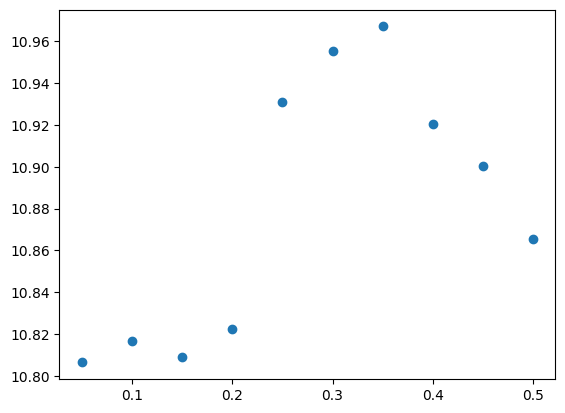

In [63]:
import matplotlib.pyplot as plt

plt.scatter(lst, error_mae)

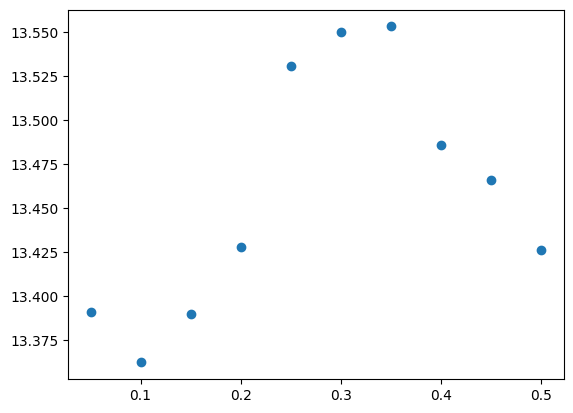

In [64]:
plt.scatter(lst, error_rmse)

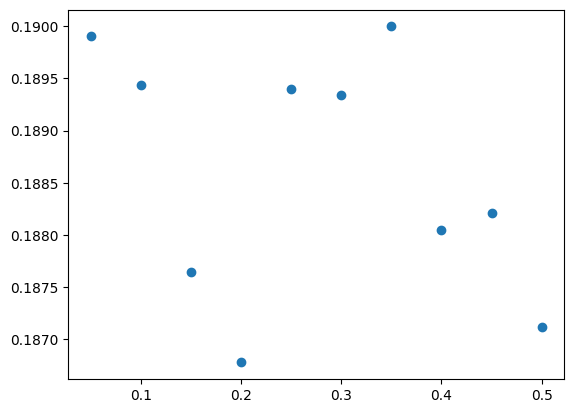

In [65]:
plt.scatter(lst, error_mape)